In [21]:
import tensorflow as tf
from tensorflow import keras

***Splittin the data***

In [22]:
datagen= keras.preprocessing.image.ImageDataGenerator(
    validation_split=0.20,
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    rescale=1./255 
)

***Defining data set path, Image dimensions & Batch size we are taking***

In [23]:
data_path = '/kaggle/input/weather-dataset/dataset'
img_hgt, img_wdt = 224, 224
btc_size = 32

Creating subset for training & validation data

In [24]:
train_ds = datagen.flow_from_directory(
    data_path,
    target_size=(img_hgt, img_wdt),
    batch_size=btc_size,
    class_mode='categorical',
    subset='training')

val_ds = datagen.flow_from_directory(
    data_path,
    target_size=(img_hgt, img_wdt),
    batch_size=btc_size,
    class_mode='categorical',
    subset='validation') 

Found 5493 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.


**The Classes available**

In [25]:
new_dict = {0: 'dew', 1: 'fogsmog', 2: 'frost', 3: 'glaze', 4: 'hail', 5: 'lightning', 6: 'rain', 7: 'rainbow', 8: 'rime', 9:'sandstorm', 10: 'snow'}

In [26]:
predictions = {}

In [27]:
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

***Defining the ResNet50 model
Adding layers with specified Neurons and Activation function***

In [28]:
IMG_SHAPE = (128,128, 3)

base_model = keras.applications.ResNet50V2(input_shape=IMG_SHAPE,
                                               include_top=False,pooling= 'avg',
                                               classes= 11,
                                               weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),#20% of edges are being dropped
    layers.Dense(64, activation = 'relu'),
    layers.Dense(11, activation='softmax'),
])

model.compile(optimizer='adam',
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()
print(model)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 dense_8 (Dense)             (None, 11)                715       
                                                                 
Total params: 24,106,507
Trainable params: 541,707
Non-trainable params: 23,564,800
_________________________________________________________________


In [29]:
from tensorflow.keras.callbacks import EarlyStopping

***Fitting the model and atoring the result of model in an array***

In [30]:
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=50,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

predictions['ResNet'] = model.evaluate(val_ds)

Epoch 1/50
172/172 [==============================] - 54s 293ms/step - loss: 0.7485 - accuracy: 0.7510 - val_loss: 0.4864 - val_accuracy: 0.8356
Epoch 2/50
172/172 [==============================] - 50s 290ms/step - loss: 0.3597 - accuracy: 0.8727 - val_loss: 0.4345 - val_accuracy: 0.8503
Epoch 3/50
172/172 [==============================] - 49s 287ms/step - loss: 0.2333 - accuracy: 0.9195 - val_loss: 0.4128 - val_accuracy: 0.8649
Epoch 4/50
172/172 [==============================] - 50s 290ms/step - loss: 0.1664 - accuracy: 0.9423 - val_loss: 0.4025 - val_accuracy: 0.8722
Epoch 5/50
172/172 [==============================] - 50s 290ms/step - loss: 0.1150 - accuracy: 0.9629 - val_loss: 0.4929 - val_accuracy: 0.8678
Epoch 6/50
43/43 [==============================] - 10s 222ms/step - loss: 0.5254 - accuracy: 0.8532


***Showcasing the Accuracy of the model***

In [31]:
for prediction in predictions.items():
    print(f"""{prediction[0]}: {round((prediction[1][1] * 100),2)}%""")

ResNet: 85.32%


In [32]:
image_path = '/kaggle/input/weather-dataset/dataset/rime/4955.jpg'

***Giving input to the trained model***

In [33]:
import cv2
import numpy as np
image = cv2.imread(str(image_path))
image_resized = cv2.resize(image,(128,128))
image = np.expand_dims(image_resized, axis = 0)
print(image.shape)


(1, 128, 128, 3)


In [34]:
pred = model.predict(image)

1/1 [==============================] - 1s 1s/step


***Classifying the image after prediction***

The image is classified as snow


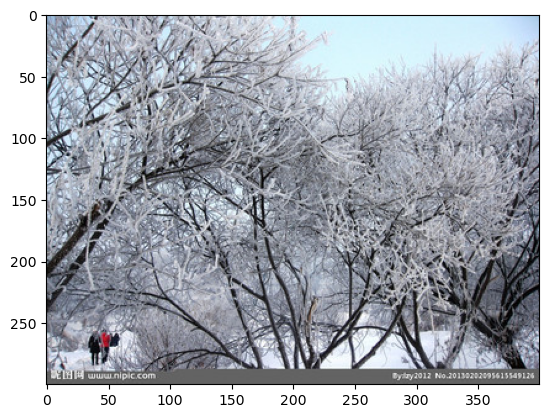

In [35]:
output_class = new_dict[np.argmax(pred)]
print(f"The image is classified as {output_class}")

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()
